<a href="https://colab.research.google.com/github/MathBird17/Optimization/blob/main/OptimizacionVariasVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a la optimizacion de campos escalares y a la funcion de Ackley. *Le Ruffy*
Cuando trabajamos con funciones del tipo $f:\mathbb{R}^n\to\mathbb{R}$ se presenta una dificultad adicional a cuando son funciones real valuadas, el principal problema es que hay infinitas direcciones a las cuales nos podemos aproximar al minimo. Sin embargo, como veremos con los siguientes 3 metodos podremos obtener la direccion del mayor descenso con el gradiente de la funcion.

El objetivo principal del presente trabajo, ademas de probar los distintos metodos de optimizacion, es el de estudiar que tan efectivos son estos metodos para encontrar un minimo global y es precisamente por esto que se ha optado por la funcion de Ackley, esta funcion tiene infinitos minimos globales y cuenta con un minimo global en el origen. Para evaluar el desempeño de los metodos en encontrar el minimo global lo que haremos sera generar de manera aleatoria el punto inicial con el que los metodos inician y observar cual es la probabilidad de que el minimo obtenido sea el global, pero primero hablaremos un poco de lo que es la optimizacion estocastica y como se relaciona con el presente trabajo.
## Optimizacion estocastica.
La optimizacion estocastica es una rama de la optimizacion que trata problemas de optimizacion en los que entra un elemento aleatorio. Un ejemplo de ello es si se quiere maximizar la utilidad de una empresa y se tiene la funcion de distribucion de los ingresos, entre otros muchos casos. De esta manera tratar problemas de optimizacion estocastica es tratar con problemas de optimizacion global, ya que cuando tenemos varios minimos locales tendriamos distintos optimos segun sean distribuidas las variables aleatorias.

# Funcion de Ackley.
En 1987 en su tesis doctoral "A connectionist machine for genetic hill climbing" David H. Ackley introduce lo que se conoce hoy como la funcion de Ackley, la cual es una generalizacion de su funcion inical y se define como:
$$f(x_1,x_2,...,x_n)=-ae^{ -b \sqrt{ \frac{1}{n} \sum_{i=1}^{n} x_i^2  } } - e^{ \frac{1}{n} \sum_{i=1}^{n} cos(cx_i) }+ a + e$$
Nosotros trabajaremos con el siguiente caso:
\begin{equation}
f(x,y)=-20e^{ -0.2\sqrt{ \frac{1}{2} ( x_1^2 +x_2^2)  } } -e^{ \frac{1}{2}  (cos(\pi x) +cos(\pi y) ) }
\end{equation}
Vamos a graficar la funcion y sus curvas de nivel para tener idea de su peculiar comportamiento:

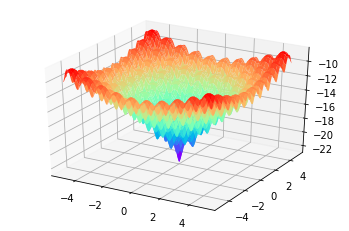

Locator attempting to generate 1788 ticks ([-22.704, ..., -8.408]), which exceeds Locator.MAXTICKS (1000).


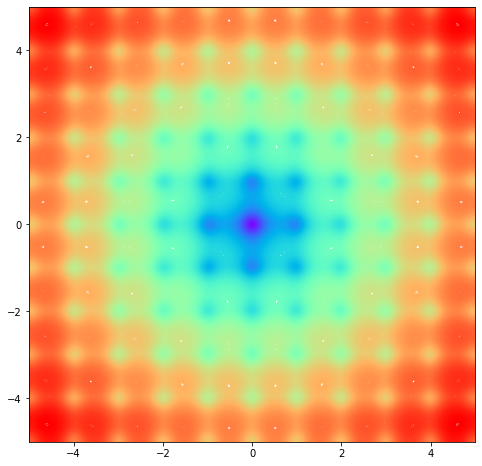

In [ ]:
#Vamos a importar los paquetes necesarios 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import random

#Ahora se graficara la funcion 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

xx = np.linspace(x_min,x_max,1000) # Patición x
yy = np.linspace(y_min,y_max,1000) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

def ackley(x): #Definimos la funcion de Ackley con la que trabajaremos
	k=-20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 +x[1]**2)))-np.exp(0.5*(np.cos(2*np.pi *x[0])+np.cos(2*np.pi *x[1])))
	return k
zs=np.array(ackley([np.ravel(X),np.ravel(Y)])) 
Z=zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap='rainbow')

plt.show()
#Graficamos las curvas de nivel con colores.
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 2000, cmap="rainbow") #coolwarm linestyles="dotted"
plt.show()

Si observamos la funcion desde un rango amplio podriamos pensar que es convexa, sin embargo, tiene unos valles mas pequeños y esto es lo que nos causa problema, ya que hay demasiados minimos locales que dificultan encontrar el minimo global. De hecho, como veremos en los tres metodos los minimos se encuentran en puntos de la forma $(n,m)$ donde n y m son enteros, esta interesante forma con la que se distribuyen los minimos nos haria pensar que al distribuir uniformemente el punto inicial de uno de los metodos tendriamos  que la probabilidad de encontrar un minimo es igual a la de hallar cualquier otro, pero todos los metodos que usaremos sirven para encontrar el minimo global con una mayor probabilidad que los demas minimos locales. 

# Metodo de Nelder-Mead.
Este es el metodo heuristico mas sencillo de todos ya que se basa en la evaluacion y comparacion de los valores de la funcion en unos puntos seleccionados. Sea $f:\mathbb{R}^n\to\mathbb{R}$ una funcion continua, empezaremos por seleccionar n+1 puntos, esto con el fin de obtener un simplex que es el politopo mas simple en un espacio, luego evaluamos los puntos para eliminar el que mayor valor tenga y reemplazarlo con un nuevo punto que estara ubicado en la semirrecta que une el mayor con el centroide de los otros n puntos, ahora solo queda saber que punto de esta semirrecta escoger y para esto usaremos alguno de los metodos de optimizacion de una variable.

Ahora, vamos a generar 1000 puntos aleatorios en el cuadrado $[-5,5]\times [-5,5]$, estos puntos seran donde inicie nuestro metodo. En la primera figura se muestran todos los minimos locales encontrados en verde mientras que abajo se muestran las curvas de nivel de la funcion, en la segunda grafica se tienen unos circulos de distintos tamaños los cuales representan la probabilidad de encontrar ese minimo con Nelder-Mead (El radio del circulo es proporcional a la probabilidad). Esto mismo se repite en los siguientes metodos.

Locator attempting to generate 4762 ticks ([-22.698, ..., -8.415000000000001]), which exceeds Locator.MAXTICKS (1000).


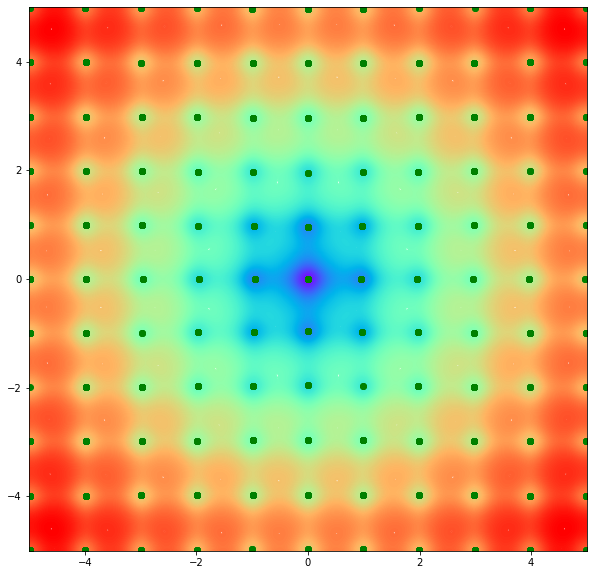

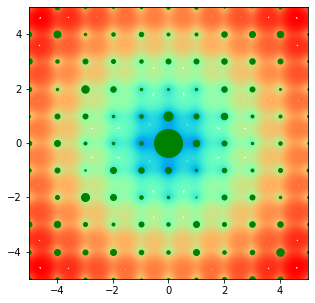

In [ ]:
#Vamos a definir el callback que sera lo que nos guarde los puntos minimos que va encontrando el metodo
x0=[-0.5,-0.5]

liX = [x0[0]]
liY = [x0[1]]
liF = [ackley(x0)]

def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(ackley(X))
#Se crea la matrix que guarda la cantidad de veces que se encuentra un minimo (n,m), la matrix es exactamente la cuadricula [-5,5]x[-5,5], es decir, la posicion [0,0] representa el punto (-5,5), la posicion [0,1] el punto (-4,5) y asi sucesivamente.
MatrixProbabilidades=[]
for i in range (0,11):
  fila=[]
  for j in range (0,11):
    fila.append(0)
  MatrixProbabilidades.append(fila)
ProbabilidadND=0 #Este sera la probabilidad de encontrar el minimo global en (0,0)
#Ahora si comienza lo bueno, vamos a crear un ciclo de 1000 repeticiones:
plt.figure(figsize=(10, 10))
for i in range(1,1001):
  #Se crea el punto inical, el cual esta distribuido de manera uniforme en [-5,5]x[-5,5]
  x1=random.uniform(-5,5)
  x2=random.uniform(-5,5)
  x0=[x1,x2]
  liX = [x0[0]]
  liY = [x0[1]]
  liF = [ackley(x0)]
  optimize.minimize(ackley, x0, method="Nelder-Mead", callback=store, options={"ftol": 1e-12}) #Se usa el metodo Nelder Mead para encontrar el minimo empezando desde nuestro punto inicial aleatorio
  plt.plot(liX[-1],liY[-1],'o',color='g') #Graficamos el punto minimo que encontramos con un punto vere
  MatrixProbabilidades[round(liX[-1])+5][round(liY[-1])+5]+=1 #Contamos la cantidad de veces que ese minimo se encuentra
ProbabilidadND=MatrixProbabilidades[5][5]/1000 #Hallamos la probabilidad de encontrar el minimo local
plt.contour(X, Y, Z, 5000, cmap="rainbow") #Graficamos las curvas de nivel que en este caso nos serviran de guia
plt.show()
#Ahora vamos a hacer el grafico que nos represente la cantidad de veces que un minimo fue encontrado
plt.figure(figsize=(5, 5))
for i in range (0,11):
  for j in range (0,11):
    plt.plot(i-5, j-5,marker="o",  markersize=(MatrixProbabilidades[i][j]/2), color='green') #Como se puede ver el tamaño es proporcional a la cantidad de veces que encontramos ese minimo
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.contour(X, Y, Z, 1000, cmap="rainbow") # Se grafican las cuervas de nivel para tener mejor idea de las probabilidades
plt.show()


Podemos observar como el punto $(0,0)$ tiene mayor probabilidad de ser el minimo encontrado, aunque como veremos al final es el metodo menos eficaz para encontrar el minimo global, pero en parte por su naturaleza heuristica que lo hace "estancarse" en minimos locales.

# Metodo gradiente.
La idea de este metodo es sencilla, consiste en usar el hecho de que la direccion opuesta del gradiente es la direccion del mayor decrecimiento de la funcion, entonces una vez tenemos esa direccion lo que tenemos es una recta y con eso usamos los metodos de optimizacion de una variable para encontrar el minimo de esa recta. Volviendo a repetir el proceso nos encontrariamos con el minimo en algun momento.

Dado que necesitamos el gradiente de la funcion de Ackley, procedemos a hallarlo:
\begin{equation}
\nabla f(x,y)=\begin{pmatrix} \frac{2.82842712474619 x e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\sqrt{x^{2} + y^{2}}} + \pi e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}}\sin{\left(2 \pi x \right)} \\ \frac{2.82842712474619 y e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\sqrt{x^{2} + y^{2}}} + \pi e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}} \sin{\left(2 \pi y \right)} \end{pmatrix}
\end{equation}

De esta manera procedemos a realizar el mismo proceso que con el anterior metodo:


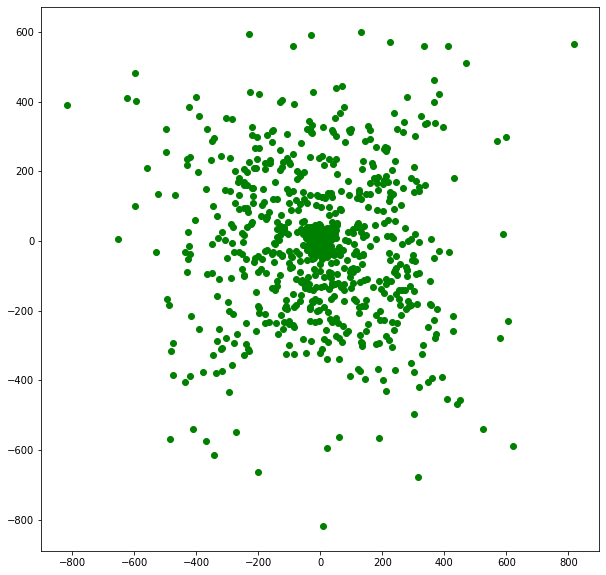

In [ ]:
liX=[]
liY=[]
liF=[]
ProbabilidadGradiente=0
def gradient_descent(x0, f, Df): #No hay un metodo como tal en el paquete scipy, solo hay linesearch que es un metodo que optimiza una funcion restringida a una linea, por lo que lo unico sera repetir este proceso siempre en direccion del gradiente hasta encontrar el minimo
  x_i, y_i = x0
  for i in range(1,100):
    liX.append(x_i)
    liY.append(y_i)
    liF.append(f([x_i,y_i]))
    dx_i, dy_i= Df(x0)
    alpha = optimize.line_search(f, Df, np.array(x0), -np.array(Df(x0))) [0] # Se optimiza la funcion en la recta con direccion opuesta al gradiente.
    if alpha == None: #Si no se encuentra un minimo en la recta se para el proceso
      break
    #Se guarda el minimo encontrado el la recta para posteriormente 
    x_i += - alpha*dx_i
    y_i += - alpha*dy_i

def Gradiente(x): #Definimos la funcion gradiente
  a=np.sqrt((x[0]**2 +x[1]**2)/2)
  b=np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])
  dx=2*(np.exp(-0.2*a)*x[0])/a +np.exp(0.5*b)*np.sin(2*np.pi*x[0])*np.pi
  dy=2*(np.exp(-0.2*a)*x[1])/a +np.exp(0.5*b)*np.sin(2*np.pi*x[1])*np.pi
  return  [dx,dy] 
#Se crea la matrix que guarda la cantidad de veces que se encuentra un minimo (n,m)
MatrixProbabilidades=[]
for i in range (0,11):
  fila=[]
  for j in range (0,11):
    fila.append(0)
  MatrixProbabilidades.append(fila)
ProbabilidadGradiente=0 #Variable que representa la probabilidad de encontrar el minimo global 
#Comenzamos a encontrar los 1000 puntos minimos :)
plt.figure(figsize=(10, 10))
for i in range(1,1001):
  liX=[]
  liY=[]
  liF=[]
  x1=random.uniform(-5,5)
  x2=random.uniform(-5,5)
  x0=[x1,x2]
  gradient_descent(x0, ackley, Gradiente)
  if round(liF[-1])==0: #Contamos las veces que el minimo es el global
    ProbabilidadGradiente+=1
  plt.plot(liX[-1],liY[-1],'o',color='g')
plt.show()
ProbabilidadGradiente=ProbabilidadGradiente/1000



Como podemos observar el metodo del gradiente es muy volatil, ya que nos podria arrojar un minimo extremadamente alejado del minimo global, sin embargo, la probabilidad de encontrar el global es mas alta que con el metodo Nelder-Mead, esto lo analizaremos mas a detalle en las conclusiones. Es debido a la alta desviacion de los minimos que no es factible hacer el grafico con los circulos de probabilidad, pero si se logro obtener la cantidad de veces que se obtuvo el minimo global.

# Metodo Gradiente Conjungado (CG).
Este metodo no difiere mucho del metodo del gradiente, en efecto comenzamos encontrando el gradiente de nuestro punto inial y optimizamos a lo largo de la recta, y otra vez volvemos a evaluar el gradiente en ese punto, sin embargo, en vez de volver a buscar el optimo en la recta simplemente vamos a tomar que el punto sobre la recta de la forma:
$$X_2=X_1 +\beta_1 \cdot \nabla f(X_1)  $$
Donde $\beta_1  = \frac{g_1^Tg_1}{g_0^Tg_0} $ y $g_k=\nabla f(X_k)$. De esta forma no tenemos que hacer el proceso de optimizar una funcion de una variable en cada iteracion con lo cual reduce bastante el costo computacional del proceso, de hecho, como veremos a continuacion es increible que este metodo tenga una probabilidad de mas del 10% de encontrar el minimo global y con un coste computacional tan bajo. Pero entonce visualicemos nuestros resultados:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: OptimizeWarning: Unknown solver options: ftol
/

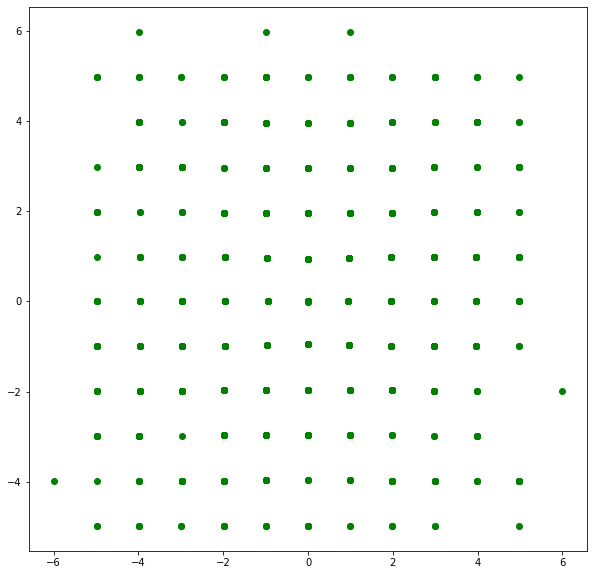

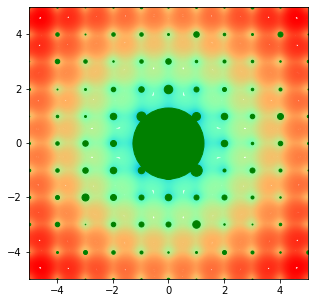

In [ ]:
MatrixProbabilidades=[]
for i in range (0,11):
  fila=[]
  for j in range (0,11):
    fila.append(0)
  MatrixProbabilidades.append(fila)
ProbabilidadCG=0 #La probabilidad de obtener el minimo global con este metodo
liX=[]
liY=[]
liF=[]


plt.figure(figsize=(10, 10))
for i in range(1,1001): #Vamos a obtener el minimo de los 1000 puntos aleatorios
  x1=random.uniform(-5,5)
  x2=random.uniform(-5,5)
  x0=[x1,x2]
  liX = [x0[0]]
  liY = [x0[1]]
  liF = [ackley(x0)]
  optimize.minimize(ackley, x0, method="CG", callback=store, options={"ftol": 1e-12})#Hallamos el minimo con el metodo CG
  plt.plot(liX[-1],liY[-1],'o',color='g') #Graficamos los puntos donde se encontro el minimo como puntos verdes
  try:
    if (abs(liX[-1])<6) and (abs(liY[-1])<6):# Observamos donde es el minimo aproximadamente y contamos 
      MatrixProbabilidades[round(liX[-1])+5][round(liY[-1])+5]+=1
  except:
    pass
ProbabilidadCG=MatrixProbabilidades[5][5]/1000 #Probabilidad de obtener el minimo global
plt.show()
#Graficamos los circulos de probabilidad
plt.figure(figsize=(5, 5))
for i in range (0,11):
  for j in range (0,11):
    plt.plot(i-5, j-5,marker="o",  markersize=(MatrixProbabilidades[i][j]/2), color='green')
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.contour(X, Y, Z, 1000, cmap="rainbow") 
plt.show()



# Metodo Newton-CG.
Recordemos que el metodo de Newton se basa en la aproximacion de la funcion por un polinomio de segundo grado, lo cual da lugar a la siguiente secuencia:
$$x_{k+1}=x_k+\cdot  H_{f}^{-1}(x_k)\nabla f(x_k)$$
Donde $H_f$ es el Hessiano de f. El gran problema de este metodo es que evaluar la inversa del Hessiano es demasiado costoso computacionalmente, y por ello es que se combina este metodo con el de gradiente conjugado para obtener el minimo de una manera menos costosa.

Un punto a tener en cuenta es que necesitamos calcular el Hessiano, es por ello que haremos uso del paquete Sympy, el cual nos permite hallar las segundas derivadas parciales de la funcion:
\begin{equation}
\frac{d^2}{dx^2}f=\frac{0.4 x^{2} e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{x^{2} + y^{2}} - \frac{2.82842712474619 x^{2} e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\left(x^{2} + y^{2}\right)^{\frac{3}{2}}} - \pi^{2} e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}} \sin^{2}{\left(2 \pi x \right)} + 2.0 \pi^{2} e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}} \cos{\left(2 \pi x \right)} + \frac{2.82842712474619 e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\sqrt{x^{2} + y^{2}}}
\end{equation}

\begin{equation}
\frac{d^2}{dxdy}f=\frac{0.4 x y e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{x^{2} + y^{2}} - \frac{2.82842712474619 x y e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\left(x^{2} + y^{2}\right)^{\frac{3}{2}}} -  \pi^{2} e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}}\sin{\left(2 \pi x \right)}\sin{\left(2 \pi y \right)}
\end{equation}

\begin{equation}
\frac{d^2}{dy^2}f=\frac{0.4 y^{2} e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{x^{2} + y^{2}} - \frac{2.82842712474619 y^{2} e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\left(x^{2} + y^{2}\right)^{\frac{3}{2}}} - \pi^{2} e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}} \sin^{2}{\left(2 \pi y \right)} + 2.0 \pi^{2} e^{0.5 \cos{\left(2 \pi x \right)} + 0.5 \cos{\left(2 \pi y \right)}} \cos{\left(2 \pi y \right)} + \frac{2.82842712474619 e^{- 0.14142135623731 \sqrt{x^{2} + y^{2}}}}{\sqrt{x^{2} + y^{2}}}
\end{equation}
Es claro que todo esto cuesta mucho computacionalmente ya que son funciones muy complejas, veamos entonces como se desempeña este metodo:

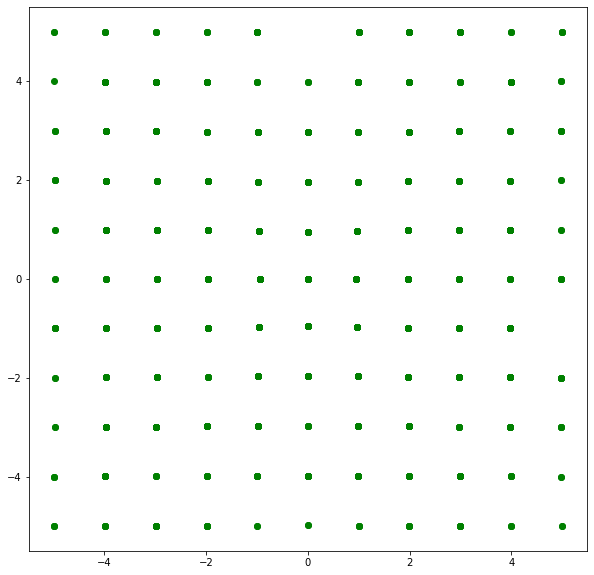

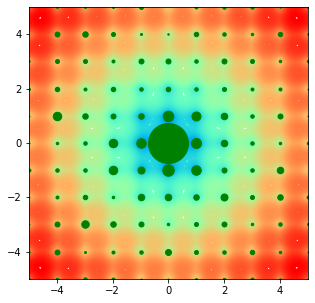

In [ ]:
import numpy as np
from scipy import optimize
from sympy import *
x,y=symbols('x y') #Definimos los simbolos que haran posible calcular las derivadas de la funcion
init_printing(use_unicode=True)
k=-20*exp(-0.2*sqrt(0.5*(x**2 +y**2)))-exp(0.5*(cos(2*pi *x)+cos(2*pi *y)))

x0=[1,1]

liX = [x0[0]]
liY = [x0[1]]
liF = [ackley(x0)]

def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(ackley(X))
#Hallamos las derivadas
dx=diff(k,x)
dy=diff(k,y)
dxdy=diff(dx,y)
dxdx=diff(dx,x)
dydy=diff(dy,y)
#Convertimos las expresiones en funciones para poder optimizar
fdx=lambdify([x,y],diff(k,x))
fdy=lambdify([x,y],diff(k,y))
fdxdy=lambdify([x,y],diff(dx,y))
fdxdx=lambdify([x,y],diff(dx,x))
fdydy=lambdify([x,y],diff(dy,y))
def JR(x):#Definimos el jacobiano que en este caso es el gradiente como funcion
  der = np.zeros_like(x)
  der[0]=fdx(x[0],x[1])
  der[1]=fdy(x[0],x[1])
  return der
def HR(x):#Definimos la hessiana como funcion
  H=np.ndarray(shape=(2,2))
  H[0,0]=fdxdx(x[0],x[1])
  H[0,1]=fdxdy(x[0],x[1])
  H[1,0]=fdxdy(x[0],x[1])
  H[1,1]=fdydy(x[0],x[1])
  return H
#Se crea la matrix de probabilidades
MatrixProbabilidades=[]
for i in range (0,11):
  fila=[]
  for j in range (0,11):
    fila.append(0)
  MatrixProbabilidades.append(fila)
ProbabilidadNC=0 #La probabilidad de obtener el minimo global con este metodo
#Procedemos a buscar el minimo en los 1000 puntos aleatorios
plt.figure(figsize=(10, 10))
for i in range(1,1001):
  x1=random.uniform(-5,5)
  x2=random.uniform(-5,5)
  x0=[x1,x2]
  liX = [x0[0]]
  liY = [x0[1]]
  liF = [ackley(x0)]
  optimize.minimize(ackley, x0, jac=JR, hess=HR, method="Newton-CG", callback=store, options={'xtol': 1e-8, 'disp': False})#Se optimiza con el metodo Newton CG
  if (abs(liX[-1])<6) and (abs(liX[-1])<6):
    try:
      MatrixProbabilidades[round(liX[-1])+5][round(liY[-1])+5]+=1 #Se cuenta las veces que se encuentra un minimo determinado
    except:
      pass
  plt.plot(liX[-1],liY[-1],'o',color='g')#Graficamos los minimos

ProbabilidadNC=MatrixProbabilidades[5][5]/1000
plt.show()
#Realizamos el grafico de los circulos de probabilidad
plt.figure(figsize=(5, 5))
for i in range (0,11):
  for j in range (0,11):
    plt.plot(i-5, j-5,marker="o",  markersize=(MatrixProbabilidades[i][j]/2), color='green')
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.contour(X, Y, Z, 1000, cmap="rainbow") 
plt.show()


# Metodo BFGS.
Evaluar una inversa de una matriz puede llegar a ser muy complicado, por lo que es una buena idea el aproximar esta inversa y esto es lo que busca hacer el metodo BFGS. El Hessiano aproximado esta dado por la formula:
$$B_{k+1}=B_k -\frac{B_k \cdot x_k \cdot x_k^T \cdot B_k}{x_k^T \cdot  B_k \cdot x_k} + \frac{y_k \cdot y_k^T}{x_k^T \cdot y_k} $$
Donde $y_k=g_{k+1} -g_k $. Por lo tanto con este metodo no vamos a necesitar calcular el Hessiano ni evaluarlo, lo que lo hace computacionalmente menos costoso que el metodo de Newton CG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: OptimizeWarning: Unknown solver options: xtol
/

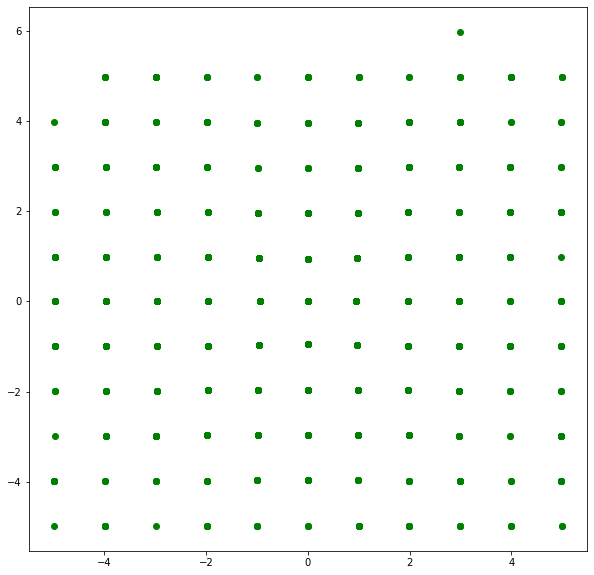

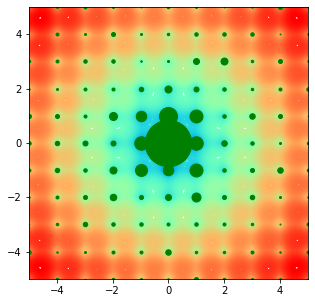

In [ ]:
#Se crea la matrix de probabilidades
MatrixProbabilidades=[]
for i in range (0,11):
  fila=[]
  for j in range (0,11):
    fila.append(0)
  MatrixProbabilidades.append(fila)
ProbabilidadBFGS=0 #La probabilidad de obtener el minimo global con este metodo

liX=[]
liY=[]
liF=[]

plt.figure(figsize=(10, 10))
for i in range(1,1001): #Vamos a obtener el minimo de los 1000 puntos aleatorios
  x1=random.uniform(-5,5)
  x2=random.uniform(-5,5)
  x0=[x1,x2]
  liX = [x0[0]]
  liY = [x0[1]]
  liF = [ackley(x0)]
  optimize.minimize(ackley, x0, jac=JR, method="BFGS", callback=store, options={'xtol': 1e-8, 'disp': False})#Hallamos el minimo con el metodo BFGS
  plt.plot(liX[-1],liY[-1],'o',color='g') #Graficamos los puntos donde se encontro el minimo como puntos verdes
  try:
    if (abs(liX[-1])<6) and (abs(liY[-1])<6):# Observamos donde es el minimo aproximadamente y contamos 
      MatrixProbabilidades[round(liX[-1])+5][round(liY[-1])+5]+=1
  except:
    pass
ProbabilidadBFGS=MatrixProbabilidades[5][5]/1000 #Probabilidad de obtener el minimo global
plt.show()
#Graficamos los circulos de probabilidad
plt.figure(figsize=(5, 5))
for i in range (0,11):
  for j in range (0,11):
    plt.plot(i-5, j-5,marker="o",  markersize=(MatrixProbabilidades[i][j]/2), color='green')
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.contour(X, Y, Z, 1000, cmap="rainbow") 
plt.show()

# Conclusiones.
Vamos a comparar las probabilidades de obtener el minimo global con cada uno de los metodos mediante el siguiente grafico:

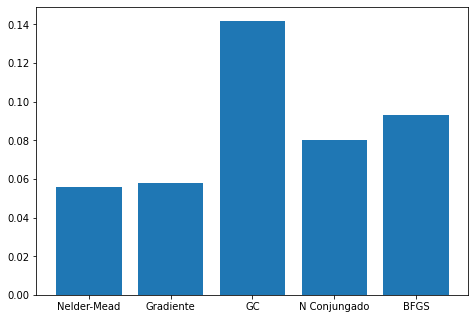

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Nelder-Mead', 'Gradiente', 'GC','N Conjungado', 'BFGS']
students = [ProbabilidadND,ProbabilidadGradiente,ProbabilidadCG,ProbabilidadNC,ProbabilidadBFGS ]#Se grafican las probabilidades como barras
ax.bar(langs,students)
plt.show()

Como se puede observar el mas eficaz es el metodo del gradiente conjugado mientras que el menos eficaz es el de Nelder-Mead. El hecho de que el metodo GC no requiera calcular un minimo de una funcion uni-variada lo hace el mas eficiente para tratar este tipo de problemas debido a que se necesitan evaluar una gran cantidad de puntos aleatorios. Tambien cabe aclarar que la funcion de Ackley es altamente simetrica, por lo que podrian cambiar los resultados segun la funcion a optimizar, en un segundo trabajo se buscara probar el codigo con distintas funciones y confirmar que el metodo GC es el mejor para obtener minimos globales.


# Bibliografia.
[1] David H. Ackley. *A connectionist machine for genetic hill climbing *, 1987.

[2] Michel De Lara. Introduction to One and Two-Stage
  Stochastic and Robust Optimization*, 2020.